# Exercício para entregar

In [51]:
import seaborn as sns
import pandas as pd
import numpy as np

**Abaixo está um código para criar dados falsos sobre a quantidade de coisas que as pessoas compram, de acordo com a faixa etária**.

Ele gera 100.000 "pessoas" aleatórias e as atribui aleatoriamente como tendo entre 20, 30, 40, 50, 60 ou 70 anos.

Em seguida, atribui uma menor probabilidade de os jovens comprarem coisas.

No final, temos dois dicionários Python:

- "totais" contém o número total de pessoas em cada faixa etária. 
- "compras" contém o número total de itens comprados por pessoas em cada faixa etária. 
- O total geral de compras é total de compras. 
- número total de pessoas é 100.000.

Vamos executá-lo e dar uma olhada:

In [9]:
from numpy import random

random.seed(0)

totals = {20:0, 30:0, 40:0, 50:0, 60:0, 70:0}
compras = {20:0, 30:0, 40:0, 50:0, 60:0, 70:0}
total_compras = 0
for _ in range(100000):
    Decada_ano = random.choice([20, 30, 40, 50, 60, 70])
    Probabilidade_compra = float(Decada_ano) / 100.0 ## por exemplo quem nasceu na decada 20/100
    totals[Decada_ano] += 1
    if (random.random() < Probabilidade_compra):
        total_compras += 1
        compras[Decada_ano] += 1
        
print(total_compras)
print(compras)
print(type(compras))

45012
{20: 3392, 30: 4974, 40: 6670, 50: 8319, 60: 9944, 70: 11713}
<class 'dict'>


In [11]:
pessoas = totals
pessoas

{20: 16576, 30: 16619, 40: 16632, 50: 16805, 60: 16664, 70: 16704}

In [12]:
compras

{20: 3392, 30: 4974, 40: 6670, 50: 8319, 60: 9944, 70: 11713}

In [13]:
total_compras

45012

In [14]:
total_pessoas = 100_000

In [113]:
total_n_compras = total_pessoas - total_compras
total_n_compras

54988

In [96]:
PC_lista = [round(total_compras*100/total_pessoas,2) for i in range(7)]
PNC_lista = [round((total_pessoas - total_compras)*100/total_pessoas,2) for i in range(7)]

1. Com os dados acima, faça um programa que calcule todas probabilidade e preencha o gráfico abaixo. O resultado do programa pode ser mostrado como e o gráfico completo deve ser anexado:


| P(C)   | I | P(I\|C) | P(I∩C) |  
|--------|-------|---|--------|
| x | 20 | 


| P(NC)   | I | P(I\|NC) | P(I∩NC) |  
|--------|-------|---|--------|
| y | 20 | 

--------------------------------------
# Primeira Parte
## Probabilidade de comprar PC
--------------------------------------

In [111]:
#P(C)
#Comprar
#P(I|C)  
lista1 = []
for i in compras:
    lista1.append(compras[i]/total_compras)
    
#P(I∩C)
lista2 = []
for i in compras:
    lista2.append(compras[i]/total_pessoas)
 
print('\n')

percentual1 = [round(i*100,2) for i in lista1]
print(percentual1)
percentual2 = [round(i*100,2) for i in lista2]
print(percentual2)

lista_keys = [i for i in pessoas.keys()]
print(lista_keys)

listaX= ['x' for i in range(7)]



[7.54, 11.05, 14.82, 18.48, 22.09, 26.02]
[3.39, 4.97, 6.67, 8.32, 9.94, 11.71]
[20, 30, 40, 50, 60, 70]


In [98]:
data1 = []
for i in range(len(lista_keys)):
    listap = []
    listap.append(PC_lista[i])
    listap.append(lista_keys[i])
    listap.append(percentual1[i])
    listap.append(percentual2[i])
    data1.append(listap)
    
PC =pd.DataFrame(np.array(data1), columns = ["P(C)","I","P(I\|C) [%]","P(I∩C) [%]"])
PC

,P(C),I,P(I\|C) [%],P(I∩C) [%]
0,45.01,20.0,7.54,3.39
1,45.01,30.0,11.05,4.97
2,45.01,40.0,14.82,6.67
3,45.01,50.0,18.48,8.32
4,45.01,60.0,22.09,9.94
5,45.01,70.0,26.02,11.71


<AxesSubplot:xlabel='I', ylabel='P(I\\|C) [%]'>

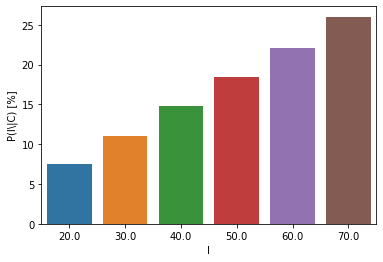

In [104]:
sns.barplot(x = PC["I"], y = PC["P(I\|C) [%]"], data = PC )

<AxesSubplot:xlabel='I', ylabel='P(I∩C) [%]'>

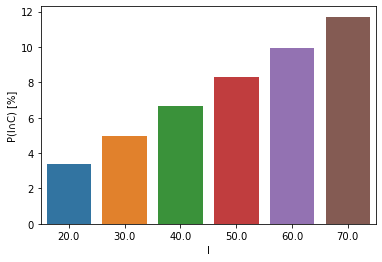

In [105]:
sns.barplot(x = PC["I"], y = PC["P(I∩C) [%]"], data = PC )

--------------------------------------
# Segunda Parte
## Probabilidade de não comprar PNC
--------------------------------------

In [114]:
#P(NC)
#Não Comprar
#P(I|NC)  
lista1NC = []
for i in compras:
    lista1NC.append((pessoas[i]-compras[i])/total_n_compras)
    
#P(I∩NC)
lista2NC = []
for i in compras:
    lista2NC.append((pessoas[i]-compras[i])/total_pessoas)
 
print('\n')

percentual1NC = [round(i*100,2) for i in lista1NC]
print(percentual1NC)
percentual2NC = [round(i*100,2) for i in lista2NC]
print(percentual2NC)

lista_keys = [i for i in pessoas.keys()]
print(lista_keys)

listaY= ['y' for i in range(7)]



[23.98, 21.18, 18.12, 15.43, 12.22, 9.08]
[13.18, 11.64, 9.96, 8.49, 6.72, 4.99]
[20, 30, 40, 50, 60, 70]


In [115]:
data2 = []
for i in range(len(lista_keys)):
    listap = []
    listap.append(PNC_lista[i])
    listap.append(lista_keys[i])
    listap.append(percentual1NC[i])
    listap.append(percentual2NC[i])
    data2.append(listap)
    
PNC =pd.DataFrame(np.array(data2), columns = ["P(NC)","I","P(I\|NC) [%]","P(I∩NC) [%]"])
PNC

,P(NC),I,P(I\|NC) [%],P(I∩NC) [%]
0,54.99,20.0,23.98,13.18
1,54.99,30.0,21.18,11.64
2,54.99,40.0,18.12,9.96
3,54.99,50.0,15.43,8.49
4,54.99,60.0,12.22,6.72
5,54.99,70.0,9.08,4.99


<AxesSubplot:xlabel='I', ylabel='P(I\\|NC) [%]'>

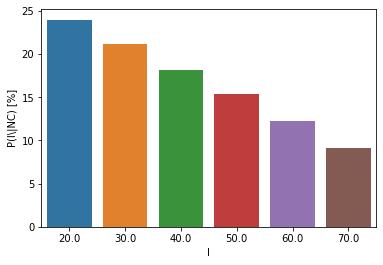

In [116]:
sns.barplot(x = PNC["I"], y = PNC["P(I\|NC) [%]"], data = PNC )

<AxesSubplot:xlabel='I', ylabel='P(I∩NC) [%]'>

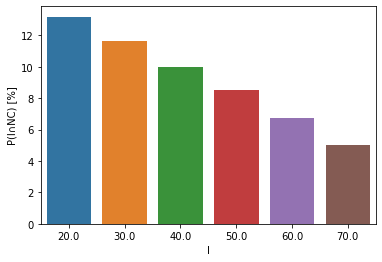

In [117]:
sns.barplot(x = PNC["I"], y = PNC["P(I∩NC) [%]"], data = PNC )

In [ ]:
#fim